In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading the dataset

In [2]:
train=pd.read_csv('./dataset/digit/train.csv')

In [3]:
test=pd.read_csv('./dataset/digit/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
X_train=train.drop('label',axis=1)
y_train=train['label']
X_test=test

## visualize number of digits classes

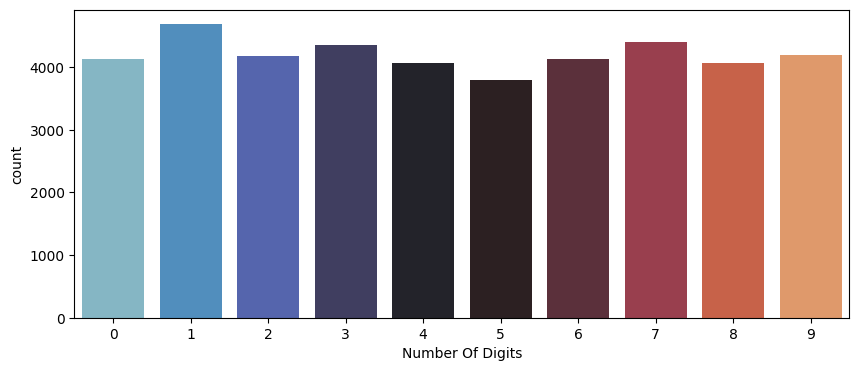

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x=y_train, palette="icefire")
plt.xlabel('Number Of Digits')
plt.show()

# Normalization, Reshape and Label Encoding
Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.
If we perform normalization, CNN works faster.
Reshape
Train and test images (28 x 28)
We reshape all data to 28x28x1 3D matrices.
Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
Label Encoding
Encode labels to one hot vectors
2 => [0,0,1,0,0,0,0,0,0,0]
4 => [0,0,0,0,1,0,0,0,0,0]

In [7]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",test.shape)

X_train shape:  (42000, 784)
X_test shape:  (28000, 784)


In [8]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

x_train shape:  (42000, 28, 28, 1)
X_test shape:  (28000, 28, 28, 1)


In [9]:
# Label Encoding 
from keras.utils import np_utils # convert to one-hot-encoding
y_train = np_utils.to_categorical(y_train, num_classes = 10)

In [10]:
print(y_train.shape)

(42000, 10)


# Split the train and the validation set for the fitting

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=11)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (33600, 28, 28, 1)
x_val shape (8400, 28, 28, 1)
y_train shape (33600, 10)
y_val shape (8400, 10)


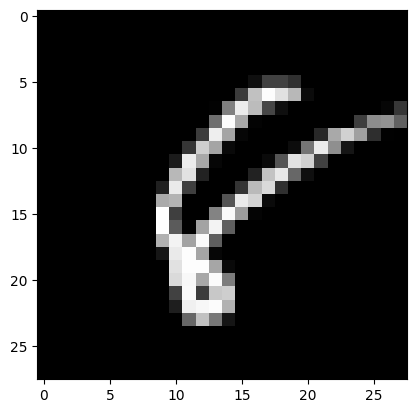

In [12]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

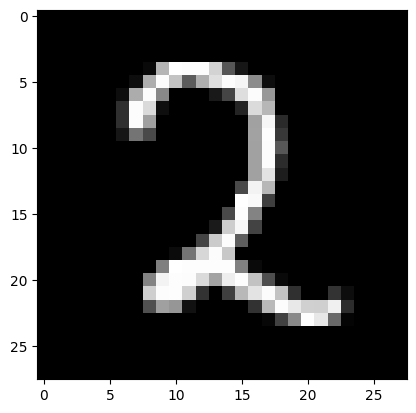

In [13]:
# Some examples
plt.imshow(X_val[2][:,:,0],cmap='gray')
plt.show()

# Convolutional Neural Network
**CNN is used for image classification, object detection**

## Create Model
**conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)**

**Dropout:** Dropout is a technique where randomly selected neurons are ignored during training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ReLU,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
cnn=Sequential()

In [16]:
#1st Layer
cnn.add(Conv2D(filters = 10, kernel_size = (5,5), 
                 activation ='relu', input_shape = (28,28,1)))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Dropout(0.2))

In [17]:
#2nd layer
cnn.add(Conv2D(filters = 10, kernel_size = (5,5), 
                 activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn.add(Dropout(0.2))

In [18]:
#Flatten
cnn.add(Flatten())

In [19]:
#Fully Conected
cnn.add(Dense(256, activation = "relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = "softmax"))

In [20]:
#Compile
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# data augmentation

In [23]:
datagen=ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False,)
datagen.fit(X_train)

In [24]:
# Fit the model
history = cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=250),
                              epochs = 10, validation_data = (X_val,y_val))

Epoch 1/10


C:\Users\madha\AppData\Local\Temp\ipykernel_17952\1929824213.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=250),


135/135 [==============================] - 13s 89ms/step - loss: 0.9717 - accuracy: 0.6800 - val_loss: 0.2128 - val_accuracy: 0.9349
Epoch 2/10
135/135 [==============================] - 10s 72ms/step - loss: 0.3387 - accuracy: 0.8949 - val_loss: 0.1393 - val_accuracy: 0.9582
Epoch 3/10
135/135 [==============================] - 10s 72ms/step - loss: 0.2571 - accuracy: 0.9193 - val_loss: 0.1082 - val_accuracy: 0.9680
Epoch 4/10
135/135 [==============================] - 9s 70ms/step - loss: 0.2144 - accuracy: 0.9324 - val_loss: 0.0943 - val_accuracy: 0.9731
Epoch 5/10
135/135 [==============================] - 9s 69ms/step - loss: 0.1851 - accuracy: 0.9417 - val_loss: 0.0845 - val_accuracy: 0.9746
Epoch 6/10
135/135 [==============================] - 9s 69ms/step - loss: 0.1741 - accuracy: 0.9451 - val_loss: 0.0769 - val_accuracy: 0.9781
Epoch 7/10
135/135 [==============================] - 9s 70ms/step - loss: 0.1582 - accuracy: 0.9521 - val_loss: 0.0700 - val_accuracy: 0.9786
Epoch 8

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

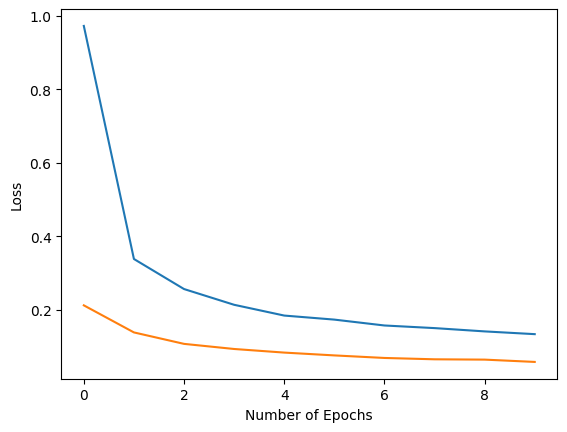

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

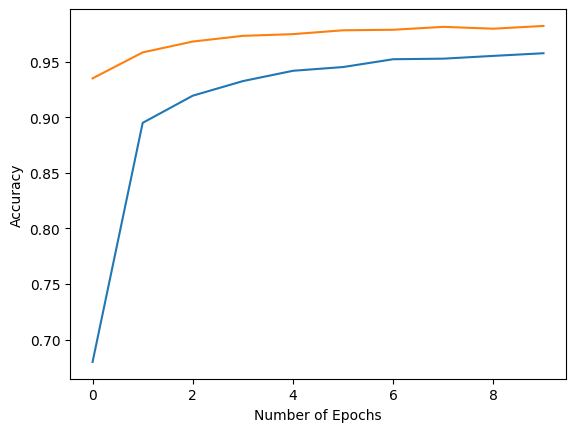

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [28]:
y_pred=cnn.predict(X_val)

263/263 [==============================] - 1s 4ms/step


In [29]:
y_pred=np.argmax(y_pred,axis=1)

In [30]:
y_pred

array([1, 7, 2, ..., 2, 6, 2], dtype=int64)

In [31]:
y_val=np.argmax(y_val,axis=1)

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [33]:
cm=confusion_matrix(y_pred,y_val)

<AxesSubplot: >

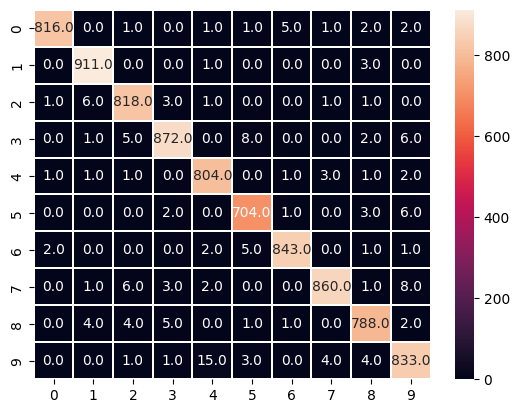

In [34]:
sns.heatmap(cm, annot=True, linewidths=0.01, fmt= '.1f')

In [35]:
y_test=cnn.predict(X_test)

875/875 [==============================] - 4s 5ms/step


In [36]:
y_test=np.argmax(y_test,axis=1)

In [37]:
y_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)